In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.layers import Dense, BatchNormalization, ELU
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Normalize pixel values to range [0, 1]
X_train,X_val, X_test = X_train / 255.0,X_val /255.0, X_test / 255.0

 Build deep neural network with 20 hidden layers

In [5]:

model = Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
for i in range(20):
    model.add(Dense(100,activation='ELU', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))  # Output layer

 Compile the model


In [6]:

model.compile(loss='sparse_categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'])

In [7]:


lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3)

In [8]:

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping,lr_scheduler ])


Epoch 1/10
1407/1407 [==============================] - 32s 16ms/step - loss: 1.9977 - accuracy: 0.2706 - val_loss: 1.9688 - val_accuracy: 0.2942 - lr: 0.0010
Epoch 2/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.8184 - accuracy: 0.3348 - val_loss: 1.8043 - val_accuracy: 0.3396 - lr: 0.0010
Epoch 3/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7568 - accuracy: 0.3640 - val_loss: 1.7862 - val_accuracy: 0.3286 - lr: 0.0010
Epoch 4/10
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7174 - accuracy: 0.3792 - val_loss: 1.7808 - val_accuracy: 0.3630 - lr: 0.0010
Epoch 5/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6840 - accuracy: 0.3950 - val_loss: 1.7368 - val_accuracy: 0.3626 - lr: 0.0010
Epoch 6/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6587 - accuracy: 0.4078 - val_loss: 1.7722 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 7/10
1407/1407 [========================

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.6227 - accuracy: 0.4241

Test accuracy: 0.42410001158714294


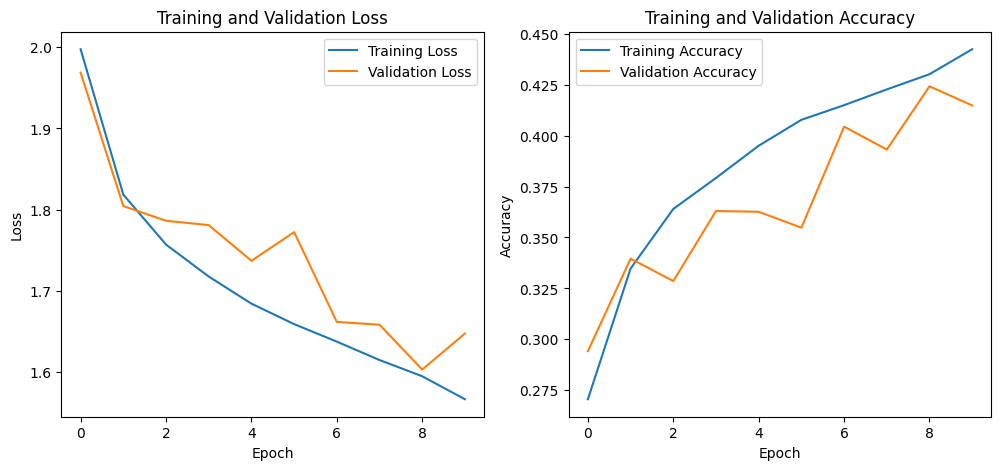

In [10]:

import matplotlib.pyplot as plt

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Batch normalization

In [11]:
# Hidden layers with Batch Normalization
for i in range(20):
    model.add(layers.Dense(100, kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Define learning rate scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

# Compile the model
model.compile(optimizer=optimizers.Nadam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:{},test loss', test_acc,test_loss)

Epoch 1/20
1407/1407 [==============================] - 77s 33ms/step - loss: 1.7124 - accuracy: 0.3954 - val_loss: 1.7602 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 2/20
1407/1407 [==============================] - 44s 31ms/step - loss: 1.6421 - accuracy: 0.4194 - val_loss: 1.8638 - val_accuracy: 0.3440 - lr: 0.0010
Epoch 3/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.6185 - accuracy: 0.4300 - val_loss: 1.8450 - val_accuracy: 0.3452 - lr: 0.0010
Epoch 4/20
1407/1407 [==============================] - 44s 31ms/step - loss: 1.5978 - accuracy: 0.4392 - val_loss: 2.1200 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 5/20
1407/1407 [==============================] - 44s 32ms/step - loss: 1.4979 - accuracy: 0.4759 - val_loss: 1.6726 - val_accuracy: 0.4128 - lr: 5.0000e-04
Epoch 6/20
1407/1407 [==============================] - 44s 31ms/step - loss: 1.4764 - accuracy: 0.4808 - val_loss: 1.6888 - val_accuracy: 0.4044 - lr: 5.0000e-04
Epoch 7/20
1407/1407 [================

In [12]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:{},test loss', test_acc,test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 1.5042 - accuracy: 0.4955

Test accuracy:{},test loss 0.49549999833106995 1.5041942596435547


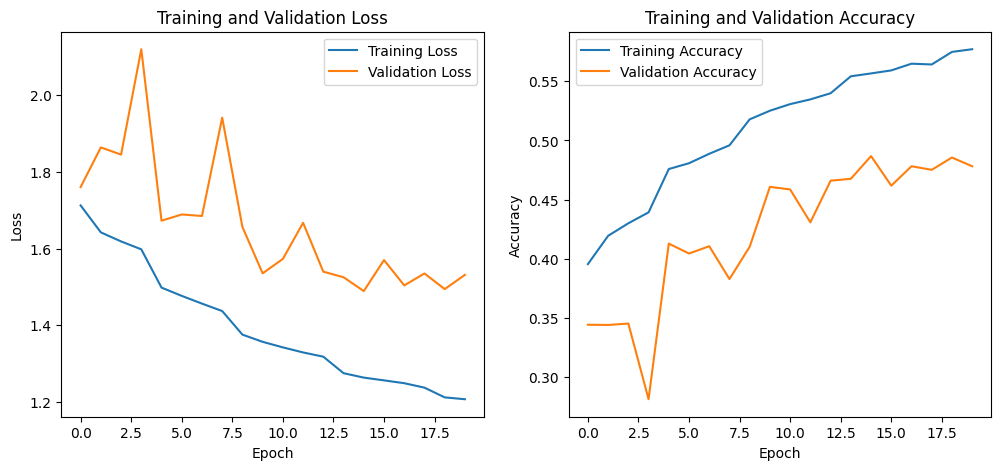

In [13]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Impact of optimizer


SGD: Test Loss=1.4108777046203613, Test Accuracy=0.5103999972343445
Adagrad: Test Loss=1.6837794780731201, Test Accuracy=0.41620001196861267
RMSprop: Test Loss=1.4211933612823486, Test Accuracy=0.5070000290870667
Adam: Test Loss=1.5045788288116455, Test Accuracy=0.4699999988079071
Nadam: Test Loss=1.4374656677246094, Test Accuracy=0.4966000020503998


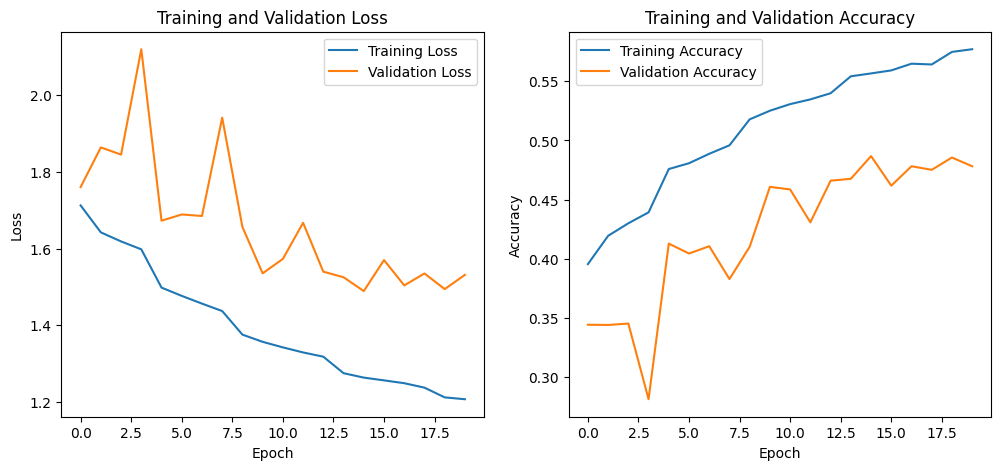

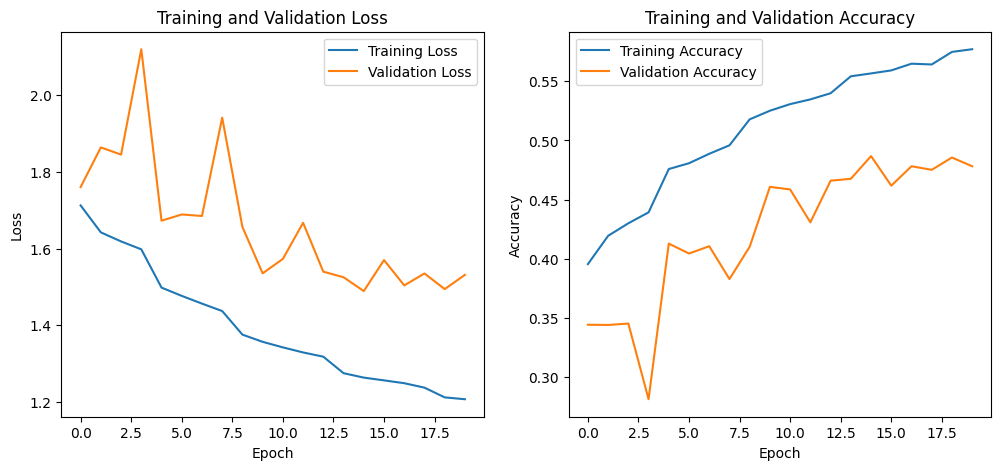

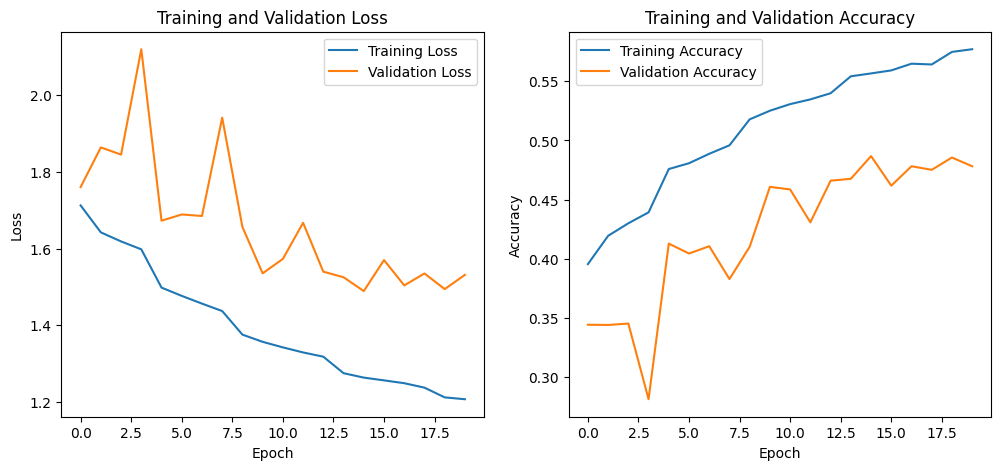

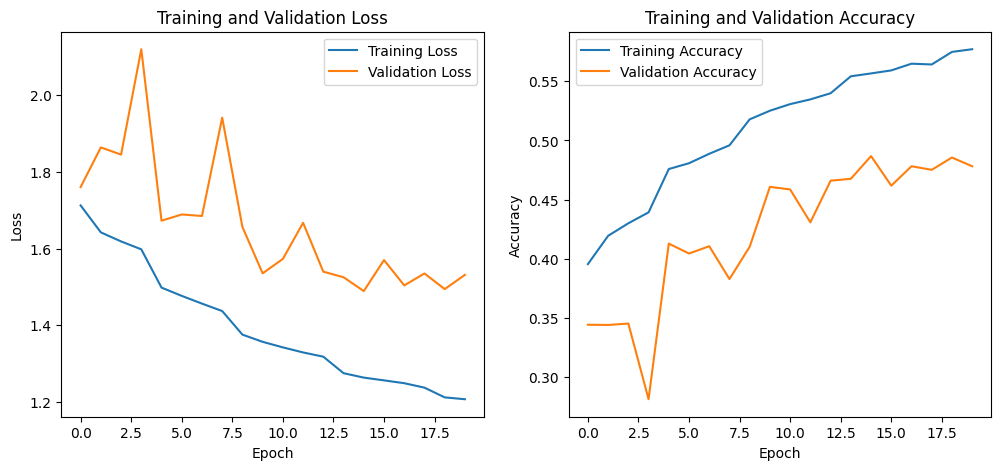

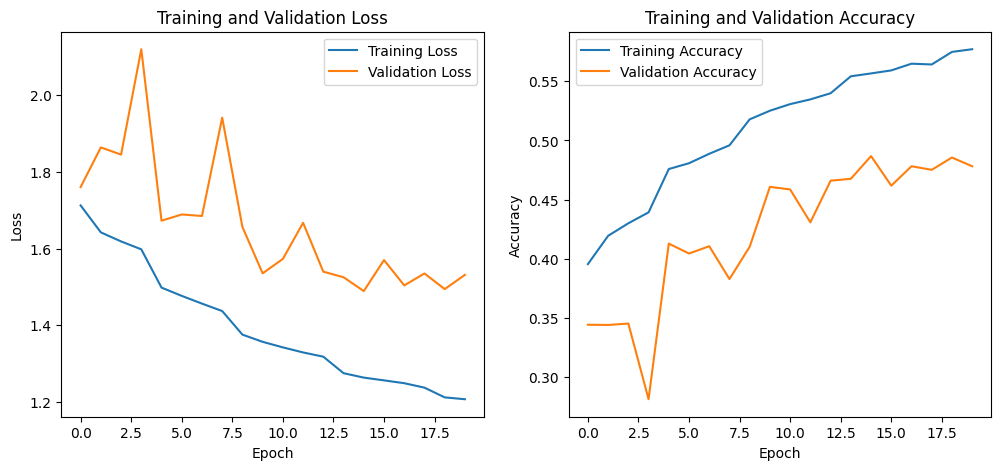

In [15]:
optimizers_list = [
    optimizers.SGD(),
    optimizers.SGD(momentum=0.9),
    optimizers.SGD(momentum=0.9, nesterov=True),
    optimizers.Adagrad(),
    optimizers.RMSprop(),
    optimizers.Adam(),
    optimizers.Nadam()
]

# Train the model with each optimizer and compare results
results = {}
for optimizer in optimizers_list:
    # Build the model
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
        layers.Dense(10, activation='softmax')
    ])


# Define learning rate scheduler
    lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

    # Define early stopping
    early_stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler], verbose=0)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Store results
    optimizer_name = optimizer.__class__.__name__
    results[optimizer_name] = {'test_loss': test_loss, 'test_acc': test_acc, 'history': history}

# Print results
for optimizer_name, result in results.items():
    print(f'{optimizer_name}: Test Loss={result["test_loss"]}, Test Accuracy={result["test_acc"]}')
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
